In [127]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
import sklearn.model_selection
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Dataset Description


<li> Age: Employee's age From 18 to 60 years old.
<li> Attrition: Whether the employee left the company or not.
<li> BusinessTravel:How frequently the employee travels . (3 categories:  Travel Rarely, Travel Frequently, Non-Travel )
<li> Daily Rate: The amount of money that employee receive per day. 
<li> Department: The department that an employee works for.(R&D, HR, Sales)
<li> DistanceFromHome: Distance in miles from company to employee's home. 
<li> Education:Employee euducational level (5 categories:Below College,College,Bachelor,Master,Doctor) 
<li> EmployeeCount: Number of Employee information included in a row. Doesn’t matter
<li> EmployeeNumber: The ID number of the employee.
<li> EnvironmentSatisfaction:How satisfied the employee feels with the environment of the company. (5 categories: 1 'Low' 2 'Medium' 3 'High' 4 'Very High')
<li> Gender: Male or Female.
<li> HourlyRate: The amount of money that employee receives per hour.
<li> JobInvolvement: The involvement level of an employee in the current job role. (4 categories:Low,Medium,High,Very High.)
<li> JobLevel:The level of the employee’s job position in the company (1 - Entry level, 5- Manager/Director position)
<li> JobRole:The job title/ designation of the employee ( Ex: sales executive, research director.<li> 
<li> JobSatisfaction: How satisfied an employee is with the nature of the work. 
(4 categories:Low,Medium,High,Very High? ) 
<li> MaritalStatus: :Single, Married or Divorced. 
<li> MonthlyIncome: Amount employee gets paid per month.
<li> MonthlyRate:the amount of money that employee receives per month.
<li> NumCompaniesWorked:Number of companies an employee has worked for. 
<li> Over18: Age of the employee is over 18 or not.  
<li> OverTime: Employee works overtime or not. 
<li> PercentSalaryHike: The % change in salary over previous year. 
<li> PerformanceRating: Annual rating of an employee’s performance. (4 categories:Low,Good,Excellent,Outstanding.) 
<li> RelationshipSatisfaction:How happy is an employee with her/his colleagues. (4 categories:Low,Medium,High,Very High.) 
<li> StandardHours: Bi-monthly standard hours of an employee - 80 hrs.(8 hrs per day)
<li> StockOptionLevel: How much company stocks option employee own.  (4 categories: 0- No stock options 3- High stock option value)
<li> TotalWorkingYears: Total number of years an employee has worked for.
<li> TrainingTimesLastYear: Total number of times an employee has taken training in last year. Here we are consider the training is not mandatory because the range of data from 0 to 6.
<li> WorkLifeBalance: How an employee perceives the balance between work schedule and personal life.(4 categories:Bad,Good,Better,Best.)
<li> YearsAtCompany: Total number of years an employee worked at that company.
<li> YearsInCurrentRole: Total number of years an employee worked in the current role.
<li> YearsSinceLastPromotion: Total number of years since an employee had a promotion. 
<li> YearsWithCurrManager: Total number of years an employee has worked for the same manager. 


In [129]:
len(df)

1470

In [130]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [131]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleaning and Data Prep

In [132]:
df.isnull().values.any()

False

In [133]:
df.Over18.unique()

array(['Y'], dtype=object)

In [134]:
df.StandardHours.unique()

array([80], dtype=int64)

In [135]:
df.EmployeeCount.unique()

array([1], dtype=int64)

Dropping columns which have unique values

In [136]:
df.drop(labels=['Over18','StandardHours','EmployeeCount'],inplace=True,axis=1)

In [137]:
df.columns

Index([u'Age', u'Attrition', u'BusinessTravel', u'DailyRate', u'Department',
       u'DistanceFromHome', u'Education', u'EducationField', u'EmployeeNumber',
       u'EnvironmentSatisfaction', u'Gender', u'HourlyRate', u'JobInvolvement',
       u'JobLevel', u'JobRole', u'JobSatisfaction', u'MaritalStatus',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked', u'OverTime',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager'],
      dtype='object')

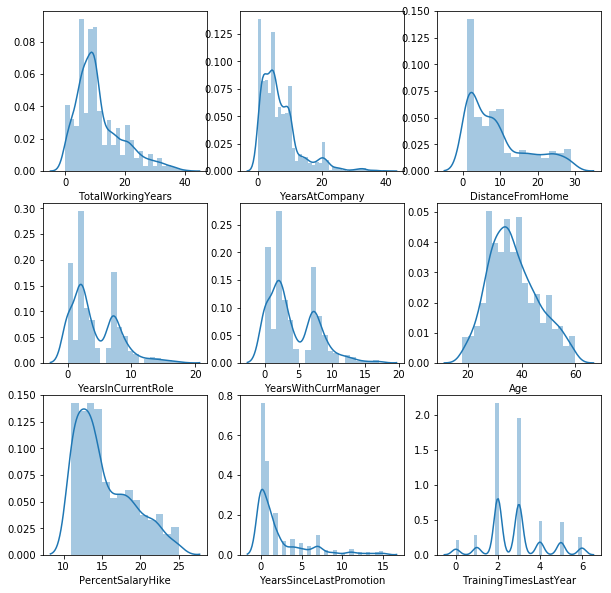

In [138]:
fig,ax = plt.pyplot.subplots(3,3, figsize=(10,10))
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(df['Age'], ax = ax[1,2]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[2,2]) 
#plt.show()

In [139]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome','Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
]

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

From the Heatmap we found that the correlation between these variables YearsInCurrentRole,YearsAtCompany,YearsSinceLastPromotion,
YearsWithCurrentManager is high. Hence we drop YearsInCurrentRole,YearsWithCurrManager and retain YearsAtCompany, YearsSinceLastPromotion

In [140]:
df['Attrition_bin'] = (df.Attrition=='Yes')*1.0
df['OverTime_bin'] = (df.OverTime=='Yes')*1.0
df1=df.copy()

Getting dummies for Machine Learning

In [141]:
df=pd.get_dummies(data=df, columns=['JobRole','MaritalStatus','Gender','BusinessTravel','EducationField','Department'])

In [142]:
df.drop(labels=['DailyRate','MonthlyRate','HourlyRate','EmployeeNumber','Gender_Male'],inplace=True,axis = 1)

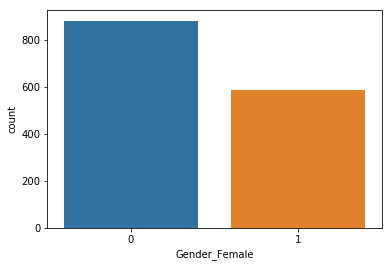

In [143]:
sns.countplot(x = 'Gender_Female', data = df)

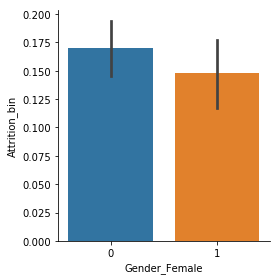

In [144]:
sns.factorplot(x = 'Gender_Female',y ='Attrition_bin', kind = 'bar',data = df)

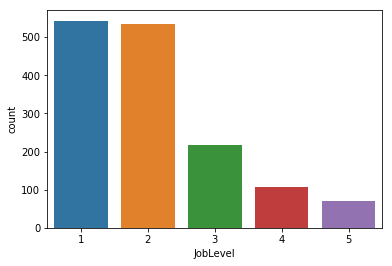

In [145]:
sns.countplot(x = 'JobLevel', data = df)

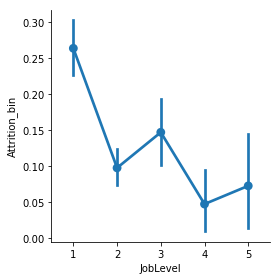

In [146]:
sns.factorplot(x = 'JobLevel', y='Attrition_bin', data = df)

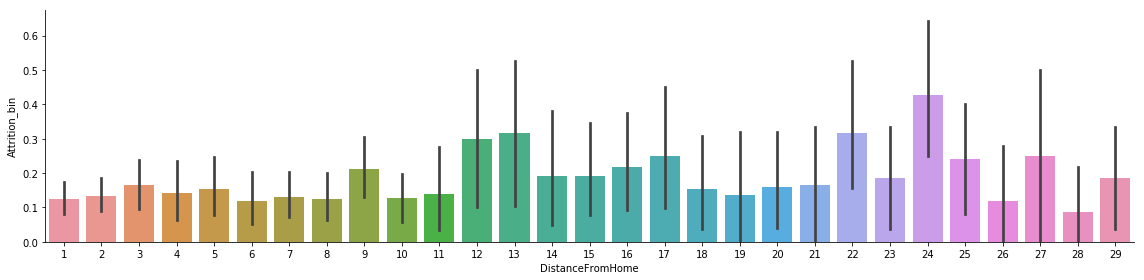

In [147]:
sns.factorplot(x = 'DistanceFromHome',y ='Attrition_bin', kind = 'bar',aspect=4,data = df)

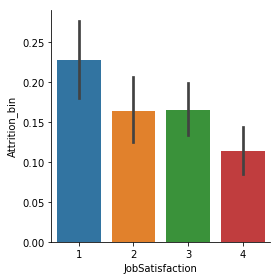

In [148]:
sns.factorplot(x = 'JobSatisfaction',y ='Attrition_bin', kind = 'bar',data = df)

<b>Creating a new column which measures stability of an employee</b>

We have defined Stability score as the ratio of experience to the number of companies worked (including the present company. We included it because the number of companies is 0 for employees who began their career in this company)

In [149]:
df['Comp_worked_incl_present'] = df['NumCompaniesWorked'] + 1
df['StabilityScore'] = df['TotalWorkingYears']/df['Comp_worked_incl_present']

<b>Creating a new column which measures satisfaction of an employee</b>

We came up with a overall satisfaction score to see if there is any cumulative effect on Attrition. 

In [150]:
df['SatisfactionScore'] = df['JobSatisfaction']+df['EnvironmentSatisfaction']+df['RelationshipSatisfaction']

Explain why dropping columns

In [151]:
df.drop(labels=['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','TotalWorkingYears',
                'NumCompaniesWorked','Comp_worked_incl_present','YearsInCurrentRole',
                'YearsWithCurrManager'],inplace=True,axis=1)

# Machine Learning - Classification

In [152]:
df.columns

Index([u'Age', u'Attrition', u'DistanceFromHome', u'Education',
       u'JobInvolvement', u'JobLevel', u'MonthlyIncome', u'OverTime',
       u'PercentSalaryHike', u'PerformanceRating', u'StockOptionLevel',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsSinceLastPromotion', u'Attrition_bin', u'OverTime_bin',
       u'JobRole_Healthcare Representative', u'JobRole_Human Resources',
       u'JobRole_Laboratory Technician', u'JobRole_Manager',
       u'JobRole_Manufacturing Director', u'JobRole_Research Director',
       u'JobRole_Research Scientist', u'JobRole_Sales Executive',
       u'JobRole_Sales Representative', u'MaritalStatus_Divorced',
       u'MaritalStatus_Married', u'MaritalStatus_Single', u'Gender_Female',
       u'BusinessTravel_Non-Travel', u'BusinessTravel_Travel_Frequently',
       u'BusinessTravel_Travel_Rarely', u'EducationField_Human Resources',
       u'EducationField_Life Sciences', u'EducationField_Marketing',
       u'EducationF

Attrition and OverTime are in the form of string variables. We have already created binary values for them.

In [153]:
df.drop(labels = ['Attrition','OverTime'],inplace=True,axis=1)

In [154]:
X = df.drop(['Attrition_bin'],axis=1)
Y = df.Attrition_bin

In [155]:
df.rename(columns={'EducationField_Life Sciences':'EducationField_LifeSciences',
                   'EducationField_Technical Degree':'EducationField_TechnicalDegree'},inplace=True)

In [156]:
df.columns

Index([u'Age', u'DistanceFromHome', u'Education', u'JobInvolvement',
       u'JobLevel', u'MonthlyIncome', u'PercentSalaryHike',
       u'PerformanceRating', u'StockOptionLevel', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsSinceLastPromotion',
       u'Attrition_bin', u'OverTime_bin', u'JobRole_Healthcare Representative',
       u'JobRole_Human Resources', u'JobRole_Laboratory Technician',
       u'JobRole_Manager', u'JobRole_Manufacturing Director',
       u'JobRole_Research Director', u'JobRole_Research Scientist',
       u'JobRole_Sales Executive', u'JobRole_Sales Representative',
       u'MaritalStatus_Divorced', u'MaritalStatus_Married',
       u'MaritalStatus_Single', u'Gender_Female', u'BusinessTravel_Non-Travel',
       u'BusinessTravel_Travel_Frequently', u'BusinessTravel_Travel_Rarely',
       u'EducationField_Human Resources', u'EducationField_LifeSciences',
       u'EducationField_Marketing', u'EducationField_Medical',
       u'EducationFi

In [157]:
clfs = [DecisionTreeClassifier(), RandomForestClassifier(n_jobs=-1),
        GaussianNB(),LogisticRegression(n_jobs=-1),AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [158]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)

In [159]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.613473113034
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.785656449547
GaussianNB(priors=None) 0.767246638084
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
       

Logistic regression has the best results ROC_AUC hence we go ahead with logistic regression.

# Logistic Regression

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [161]:
cl = LogisticRegression(random_state = 0)
cl.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
(cl.predict(X_test) == Y_test).mean()

0.87074829931972786

In [164]:
y_pred = cl.predict(X_test)

In [165]:
y_pred_probability = cl.predict_proba(X_test)[:,1]

<b>The following data shows the expected attrition probability for each employee</b>

In [166]:
y_pred_probability[::10]

array([ 0.06482572,  0.0041891 ,  0.19244136,  0.02693035,  0.14548296,
        0.12150452,  0.02362282,  0.18465855,  0.00565857,  0.13392973,
        0.18292171,  0.02441421,  0.18913875,  0.00626637,  0.06707353,
        0.00803069,  0.17436283,  0.07463269,  0.04161674,  0.34889923,
        0.34384373,  0.1160142 ,  0.12064296,  0.01606798,  0.16168785,
        0.21554926,  0.23552649,  0.05473864,  0.49273559,  0.09619356,
        0.24620811,  0.42942285,  0.31736161,  0.03311957,  0.15502351,
        0.01952559,  0.00292394,  0.00614514,  0.20133495,  0.0340305 ,
        0.68103918,  0.14509451,  0.32354327,  0.13028075,  0.00148942])

In [167]:
confusion_matrix(Y_test,y_pred)

array([[364,   7],
       [ 50,  20]], dtype=int64)

In [168]:
met.accuracy_score(Y_test,y_pred)

0.87074829931972786

In [169]:
met.precision_score(Y_test,y_pred)

0.7407407407407407

In [170]:
met.recall_score(Y_test,y_pred)

0.2857142857142857

<b>Because of the unbalanced data (High number of 0's and less number of 1's in Y) we have such a low recall score of 28.5%</b>

# Machine Learning - Decision Tree Regressor

In [171]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 3)

In [172]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [173]:
Y.mean()

0.16122448979591836

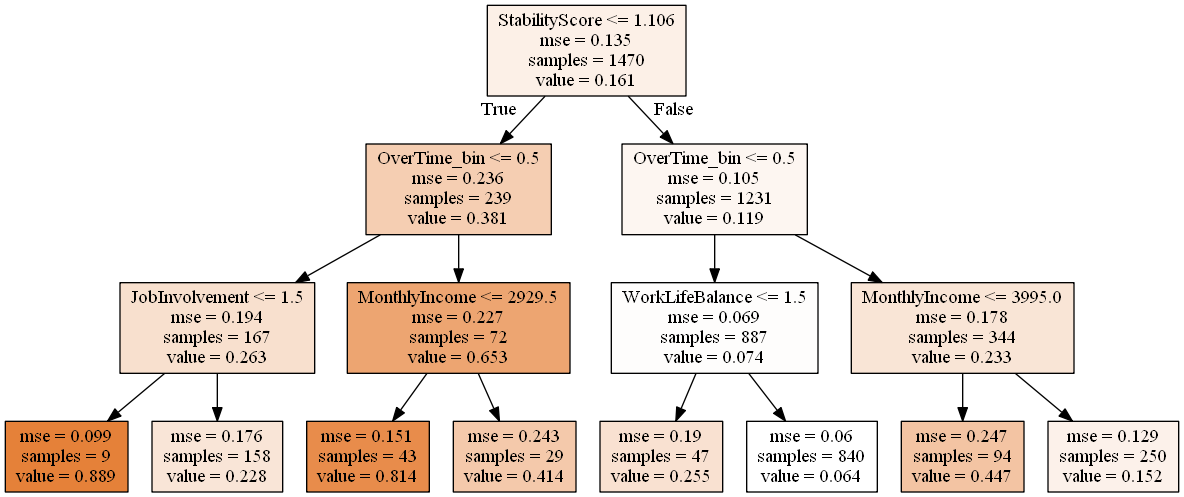

In [174]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import numpy as np

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# DecisionTreeRegressor Insights

<b>
<li>Less stable employees who work overtime and has a monthly income of less than 2929.5 are more likely to leave the company.
<li>Less stable employees who don't work overtime but has less job involvement are more likely to leave the company.
<li>Stable employees who work overtime and has a monthly income of less than 3995 are more likely to leave the company.
<li>Stable employees who don't work overtime and has less work life balance are more likely to leave the company.
</b>

We perform clustering to get more interesting insights on the dataset.

# Machine Learning - Performing KMeans Clustering

In [175]:
clu = KMeans(n_clusters=4, random_state=0)
clu.fit(df)
df['seg']=clu.labels_
segments=df.groupby('seg').mean()

In [176]:
segments.Attrition_bin

seg
0    0.240464
1    0.036232
2    0.141631
3    0.108871
Name: Attrition_bin, dtype: float64

### Segment 0 includes employees with high Attrition rate and segment 1 includes employees with lowe attrition rate

In [177]:
segments

,Age,DistanceFromHome,Education,JobInvolvement,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,...,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree,Department_Human Resources,Department_Research & Development,Department_Sales,StabilityScore,SatisfactionScore
seg,,,,,,,,,,,,,,,,,,,,,
0,33.019900,8.932007,2.728027,2.756219,1.140962,2840.477612,15.328358,3.164179,0.761194,2.824212,...,0.424544,0.051410,0.330017,0.064677,0.106136,0.054726,0.779436,0.165837,2.661894,8.165837
1,47.434783,7.594203,3.094203,2.768116,4.500000,17938.115942,14.992754,3.152174,0.760870,2.724638,...,0.420290,0.094203,0.355072,0.050725,0.036232,0.072464,0.695652,0.231884,8.414573,8.282609
2,40.901288,10.381974,3.000000,2.639485,3.030043,10818.270386,15.343348,3.158798,0.802575,2.789700,...,0.399142,0.163090,0.291845,0.038627,0.103004,0.025751,0.566524,0.407725,5.993400,8.163090
3,36.877016,9.395161,3.046371,2.729839,2.054435,5746.741935,15.062500,3.139113,0.838710,2.794355,...,0.401210,0.155242,0.298387,0.054435,0.078629,0.028226,0.530242,0.441532,4.035518,8.125000


Notable attributes which causes attrition:

<li>YearsAtCompany
<li>YearsSinceLastPromotion
<li>JobRole_Laboratory Technician
<li>JobRole_Research Scientist
<li>JobRole_Sales Representative
<li>MaritalStatus_Single
<li>Age
<li>Education
<li>JobLevel
<li>StabilityScore
<li>MaritalStatus_Married-stable

## Finding 1 - Gender Dimension
### Female employees in HR Department have the highest attrition rate, in spite of higher monthly income, stock option level and frequent promotions compared to male employees.


<b>Machine Learning - First we used Decision Tree Regressors to find out what are the key variables.</b>

In [178]:
df.columns

Index([u'Age', u'DistanceFromHome', u'Education', u'JobInvolvement',
       u'JobLevel', u'MonthlyIncome', u'PercentSalaryHike',
       u'PerformanceRating', u'StockOptionLevel', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsSinceLastPromotion',
       u'Attrition_bin', u'OverTime_bin', u'JobRole_Healthcare Representative',
       u'JobRole_Human Resources', u'JobRole_Laboratory Technician',
       u'JobRole_Manager', u'JobRole_Manufacturing Director',
       u'JobRole_Research Director', u'JobRole_Research Scientist',
       u'JobRole_Sales Executive', u'JobRole_Sales Representative',
       u'MaritalStatus_Divorced', u'MaritalStatus_Married',
       u'MaritalStatus_Single', u'Gender_Female', u'BusinessTravel_Non-Travel',
       u'BusinessTravel_Travel_Frequently', u'BusinessTravel_Travel_Rarely',
       u'EducationField_Human Resources', u'EducationField_LifeSciences',
       u'EducationField_Marketing', u'EducationField_Medical',
       u'EducationFi

In [179]:
df = df.rename(columns = {'Department_Human Resources':'Department_HumanResources'})

### Decision Tree for Subset of HR employees

In [180]:
hr = df[df['Department_HumanResources'] == 1]

In [181]:
hr.drop(['EducationField_LifeSciences','EducationField_Marketing','EducationField_Medical',
       'EducationField_Other', 'EducationField_TechnicalDegree'],axis=1, inplace = True)

In [182]:
X = hr.drop(['Attrition_bin'],axis=1)
Y = hr.Attrition_bin

In [183]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 3)

In [184]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [185]:
Y.mean()

0.19047619047619047

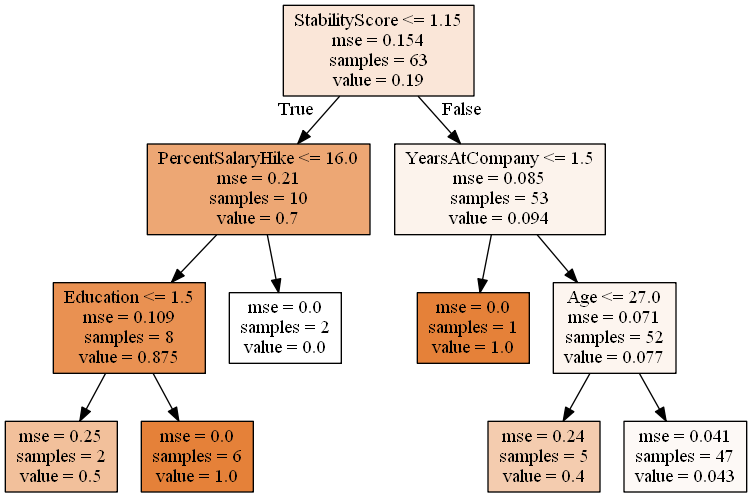

In [186]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import numpy as np

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())


<b>Analysis
<li>Based on the above decision tree regressor we identified that variables such as PercentSalary Hike, StabilityScore, Monthly income, Education and Years at Company are the significant variables which affects attrition in HR department.</b>

<b>Further Analysis</b>

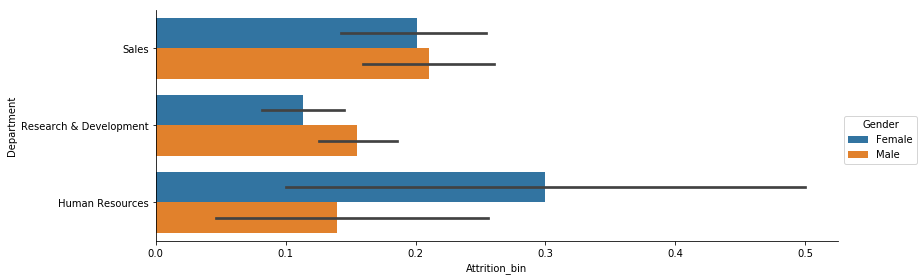

In [187]:
sns.factorplot(x='Attrition_bin',y='Department',hue='Gender',kind='bar',aspect=3,data=df1)

### Attrition is high for female in HR whereas in other departments male attrition is high

In [188]:
df1['Comp_worked_incl_present'] = df1['NumCompaniesWorked'] + 1
df1['StabilityScore'] = df1['TotalWorkingYears']/df1['Comp_worked_incl_present']
df1['SatisfactionScore'] = df1['JobSatisfaction']+df1['EnvironmentSatisfaction']+df1['RelationshipSatisfaction']

In [189]:
df1[df1.Department=='Human Resources'].groupby(['Gender']).agg({'Attrition_bin':['mean'],
                                                                   'MonthlyIncome':'mean',
                                            'SatisfactionScore':'mean','StabilityScore':'mean',
                                            'YearsSinceLastPromotion':'mean', 'PercentSalaryHike':'mean',
                                            'Age':'mean','DistanceFromHome':'mean', 'Education':'mean',
                                            'OverTime_bin':'mean','PerformanceRating':'mean',
                                            'StockOptionLevel':'mean', 'TotalWorkingYears':'mean',
                                            'TrainingTimesLastYear':'mean', 'WorkLifeBalance':'mean'})
                                            

,PercentSalaryHike,YearsSinceLastPromotion,Age,TotalWorkingYears,OverTime_bin,StabilityScore,TrainingTimesLastYear,SatisfactionScore,PerformanceRating,MonthlyIncome,StockOptionLevel,DistanceFromHome,Attrition_bin,WorkLifeBalance,Education
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Gender,,,,,,,,,,,,,,,
Female,14.600000,1.450000,37.650000,11.400000,0.300000,3.792341,2.300000,8.55,3.150000,7264.000000,0.850000,11.800000,0.300000,2.950000,3.050000
Male,14.837209,1.930233,37.883721,11.627907,0.255814,4.447914,2.674419,8.00,3.139535,6371.023256,0.744186,7.255814,0.139535,2.906977,2.930233


### Female get frequent promortions, tend to have a higher salary, higher performance rating than men and the hike is also only maginally less compared to men. Yet they tend have a higher attrition. Why??

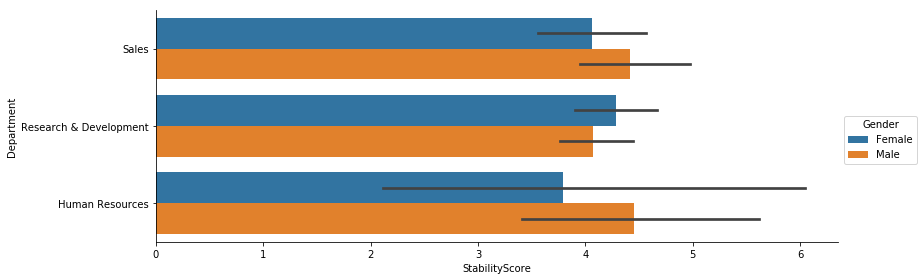

In [190]:
sns.factorplot(y='Department',x='StabilityScore',hue='Gender',kind='bar',aspect=3,data=df1)

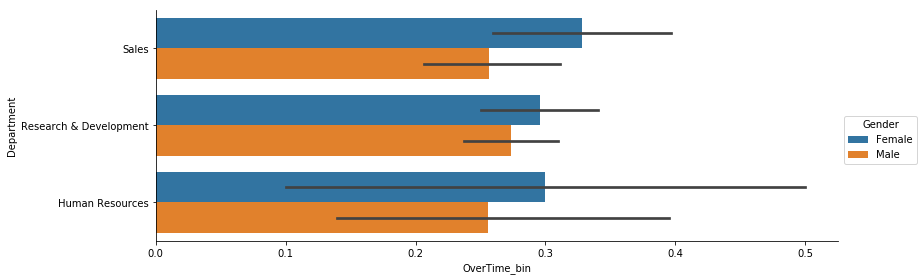

In [191]:
sns.factorplot(y='Department',x='OverTime_bin',hue='Gender',kind='bar',aspect=3,data=df1)

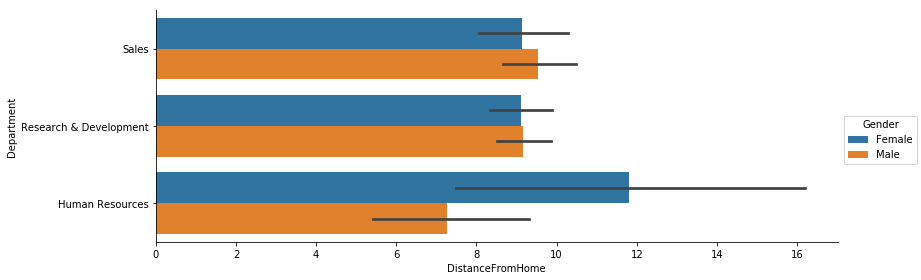

In [192]:
sns.factorplot(y='Department',x='DistanceFromHome',hue='Gender',kind='bar',aspect=3,data=df1)

### Women in HR are less stable, work for more hours, travel longer distance from home compared to men in HR. But these cannot be the only reasons for a higher attrition of female HR. 

### We found that Women in HR have a higher demand. 76% of Human Resources are women, according to 2014 statistics from the US Department of Labor. It is a female-dominated market. This can be verified in the following link.
### https://www.visier.com/clarity/gender-divide-part-1

    
###  Possible reasons: Women HR have a higher demand in the market and the added overtime and long distance to commute makes them leave the job faster.


## Strategies to control female attrition in HR:
### <li>HR female monthly income should be matched with market salary standards.<li>Introduce flexible timings, work from home options to people who stay farther distance from office if possible.


## Finding 2- Satisfaction Dimension 

### Among the least satisfied employees, R&D department has the lowest attrition and HR Department has the highest attrition rate.

Filtering the least satisfied people and grouping by job role

In [213]:
sat=df1[['Attrition_bin','DistanceFromHome','MaritalStatus','Gender','OverTime_bin','StockOptionLevel',
         'JobSatisfaction','Department','YearsSinceLastPromotion']]

### Decision Tree for least satisfied employees

In [214]:
sat=pd.get_dummies(data=sat,columns=['Department','Gender','MaritalStatus'])

In [215]:
sat=sat[sat.JobSatisfaction==1]

In [216]:
sat.columns

Index([u'Attrition_bin', u'DistanceFromHome', u'OverTime_bin',
       u'StockOptionLevel', u'JobSatisfaction', u'YearsSinceLastPromotion',
       u'Department_Human Resources', u'Department_Research & Development',
       u'Department_Sales', u'Gender_Female', u'Gender_Male',
       u'MaritalStatus_Divorced', u'MaritalStatus_Married',
       u'MaritalStatus_Single'],
      dtype='object')

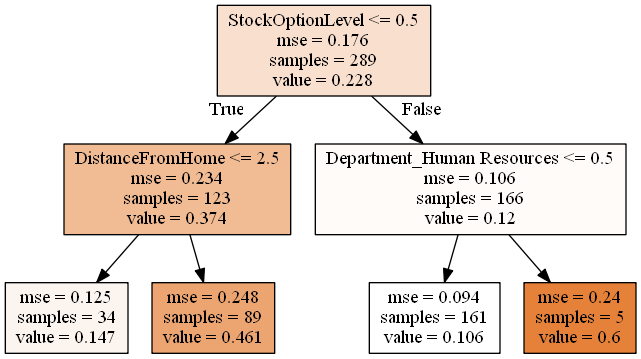

In [217]:
X = sat.drop(['Attrition_bin'],axis=1)
Y = sat.Attrition_bin

dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

dt.fit(X,Y)

Y.mean()

import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import numpy as np

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())



<b>Analysis
<li>Based on the above Decision Tree regressor we identified variables such as StockOption Level, Distance from Home and Department will significantly impact attrition for least satisfied employees.
</b>

In [198]:
a=df1[df1.JobSatisfaction==1].groupby(['Department'])['Attrition_bin'].agg(['mean','count'])

In [199]:
a.reset_index(inplace=True)

In [200]:
a.rename(columns={'mean':'Attrition','count':'Least_satisfied_employees'},inplace=True)

In [201]:
a

,Department,Attrition,Least_satisfied_employees
0,Human Resources,0.454545,11
1,Research & Development,0.197917,192
2,Sales,0.267442,86


In [202]:
print 'Proportion of least satisfied emp in HR', a.loc[(a.Department=='Human Resources'),
            'Least_satisfied_employees'].values[0]/ float(len(df1[(df1.Department=='Human Resources')])) 

Proportion of least satisfied emp in HR 0.174603174603


In [203]:
print 'Proportion of least satisfied emp in R&D', a.loc[(a.Department=='Research & Development'),
            'Least_satisfied_employees'].values[0]/ float(len(df1[(df1.Department=='Research & Development')]))

Proportion of least satisfied emp in R&D 0.199791883455


In [204]:
print 'Proportion of least satisfied emp in Sales', a.loc[(a.Department=='Sales'),
            'Least_satisfied_employees'].values[0]/ float(len(df1[(df1.Department=='Sales')]))

Proportion of least satisfied emp in Sales 0.192825112108


### Proportion of the least satisfied people is nearly the same in all the three departments, actually a little less in HR. 

## Yet, R&D has the lowest attrition rate and HR has the highest attrition rate among the three departments

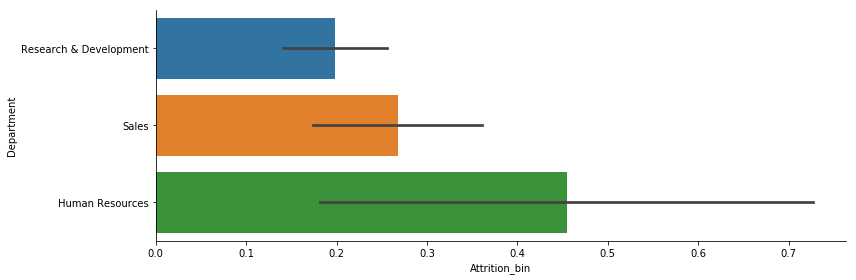

In [205]:
sns.factorplot(y='Department',x='Attrition_bin',kind='bar',aspect=3,data=df1[df1.JobSatisfaction==1])

### With less job satisfaction, R&D employees tend to stick in the same job as opposed to HR who have a high attrition rate, even though the proportion of less satisfied people are approximately same in both departments.

 ### Possible reasons: R&D job are domain specific and relatively less as compared to HR jobs

## Strategies to reduce Attrition in HR:
### <li>Improve the overall satisfaction for all employees by rewarding and recognizing the employees more frequently<li>Improve job satisfaction by ensuring goals and expectations meet the employees deliverables.


# Finding 3: Education Field Dimension 



### Employees working in Medical field have the highest attrition at Job Level 3 because they don’t get frequent promotions.

In [218]:
df1['LastPromotion'] = pd.cut(df1['YearsSinceLastPromotion'],bins=[0,3,5,8,12,16],right=False)


In [219]:
med = df1[(df1['EducationField'] == 'Medical')]

In [220]:
Other = df1[(df1['EducationField'] == 'Other')|(df1['EducationField'] == 'Marketing')\
           |(df1['EducationField'] == 'Human Resources')|(df1['EducationField'] == 'Life Sciences')\
           |(df1['EducationField'] == 'Technical Degree')]

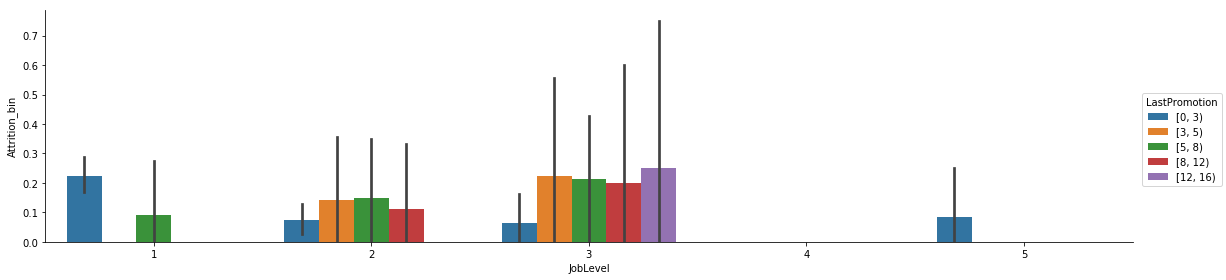

In [221]:
sns.factorplot(x = 'JobLevel',hue = 'LastPromotion', y = 'Attrition_bin',kind='bar',aspect=4, data = med)

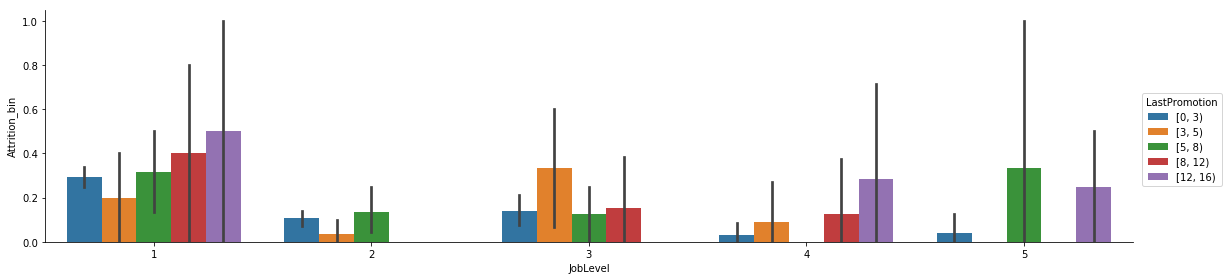

In [222]:
sns.factorplot(x = 'JobLevel',hue = 'LastPromotion', y = 'Attrition_bin',kind='bar',aspect=4, data = Other)

In [223]:
med[med.JobLevel==3].groupby(['JobLevel','LastPromotion'])[['Attrition_bin']].agg(['mean','count'])

Attrition_bin      
                                mean count
JobLevel LastPromotion                    
3        [0, 3)             0.064516    31
         [3, 5)             0.222222     9
         [5, 8)             0.214286    14
         [8, 12)            0.200000     5
         [12, 16)           0.250000     4

In [212]:
Other[Other.JobLevel==3].groupby(['JobLevel','LastPromotion'])[['Attrition_bin']].agg(['mean','size'])

Attrition_bin     
                                mean size
JobLevel LastPromotion                   
3        [0, 3)             0.138298   94
         [3, 5)             0.333333   15
         [5, 8)             0.125000   24
         [8, 12)            0.153846   13
         [12, 16)           0.000000    9

### Employees from medical field are more prone to attrition at Job Level 3, if they are stuck at the same level for more than 5 years as compared to other fields.


## Strategy:
### Even though there is less scope for promotions at Job Level 3, business has to make sure that employees from medical field get paid well and give enough incentives to make those talents stay.